 Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image 
import glob        #list the files which has specfifc pattern
import os

Loading and Preparing the Dataset

In [2]:
data = './images'

In [3]:
image_names = [os.path.basename(file) for file in glob.glob(os.path.join(data, "*.jpg"))]

In [4]:
image_names

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.jpg',
 'Abyssinian_136.jpg',
 'Abyssinian_137.jpg',
 'Abyssinian_138.

In [5]:
labels = [' '.join(name.split('_')[:-1:]) for name in image_names]

In [6]:
labels

['Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssini

In [7]:
unique = set(labels)

In [8]:
unique

{'Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British Shorthair',
 'Egyptian Mau',
 'Maine Coon',
 'Persian',
 'Ragdoll',
 'Russian Blue',
 'Siamese',
 'Sphynx',
 'american bulldog',
 'american pit bull terrier',
 'basset hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english cocker spaniel',
 'english setter',
 'german shorthaired',
 'great pyrenees',
 'havanese',
 'japanese chin',
 'keeshond',
 'leonberger',
 'miniature pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint bernard',
 'samoyed',
 'scottish terrier',
 'shiba inu',
 'staffordshire bull terrier',
 'wheaten terrier',
 'yorkshire terrier'}

Encoding

In [9]:
def label_encode(labels):
    if labels == 'Abyssinian': return 0
    elif labels == 'Bengal': return 1
    elif labels == 'Birman': return 2
    elif labels == 'Bombay': return 3
    elif labels == 'British Shorthair': return 4
    elif labels == 'Egyptian Mau': return 5
    elif labels == 'american bulldog': return 6
    elif labels == 'american pit bull terrier': return 7
    elif labels == 'basset hound': return 8
    elif labels == 'beagle': return 9
    elif labels == 'boxer': return 10
    elif labels == 'chihuahua': return 11
    elif labels == 'english cocker spaniel': return 12
    elif labels == 'english setter': return 13
    elif labels == 'german shorthaired': return 14
    elif labels == 'great pyrenees': return 15

In [10]:
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array # load_img -> reading the actual image like dimesion , color .. etc 

In [11]:
features = []
labels = []
image_size = (224,224)

for names in image_names :
    label = ' '.join(names.split('_')[:-1:])
    label_encoded = label_encode(label)
    if label_encoded != None:
        img = load_img(os.path.join(data, names))
        img = tf.image.resize_with_pad(img_to_array(img,dtype='uint8'), *image_size).numpy().astype('uint8')
        image = np.array(img)
        features.append(image)
        labels.append(label_encoded)

In [12]:
features_array = np.array(features)
labels_array = np.array(labels)

In [13]:
labels_one_hot = pd.get_dummies(labels_array) #get_dummies -> convert catergorial data into dummy or indicator variable 

In [14]:
labels_one_hot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


Model Training

In [15]:
from sklearn.model_selection import train_test_split

# Train = 60% , val = 20%  and Test = 20%
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_one_hot, test_size = 0.2 , random_state = 42) 

In [16]:
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [17]:
from tensorflow.keras import layers, Input, Model  # Input -> for input , Model -> model evalution
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout 
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [18]:
data_augmentation = Sequential([RandomFlip("horizontal_and_vertical"), RandomRotation(0.2)])
prediction_layers = Dense(16, activation = 'softmax')

In [19]:
resnet_model = ResNet50(include_top=False, pooling='avg',weights='imagenet')
resnet_model.trainable = False
preprocess_input = pp

Build Model

In [20]:
inputs = Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = resnet_model(x, training=False)
x = Dropout(0.2)(x)
outputs = prediction_layers(x)
model = Model(inputs, outputs)

In [21]:
model.compile(optimizer=Adam(),loss=CategoricalCrossentropy(),metrics = ['accuracy'])

In [22]:
model_history = model.fit(x=X_train,y=y_train, validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.2732 - loss: 2.5249 - val_accuracy: 0.8219 - val_loss: 0.5955
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.7440 - loss: 0.8192 - val_accuracy: 0.8609 - val_loss: 0.4404
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.7978 - loss: 0.6386 - val_accuracy: 0.8906 - val_loss: 0.3201
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.8236 - loss: 0.5643 - val_accuracy: 0.8938 - val_loss: 0.2945
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.8583 - loss: 0.4534 - val_accuracy: 0.8969 - val_loss: 0.2904
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.8418 - loss: 0.4633 - val_accuracy: 0.9125 - val_loss: 0.2669
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.8668 - loss: 0.4025 - val_accuracy: 0.9016 - val_loss: 0.2715
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.8766 - loss: 0.3925 - val_accuracy: 0.9141 - v

In [23]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Evaluation

Text(0.5, 1.0, 'Training and validation loss')

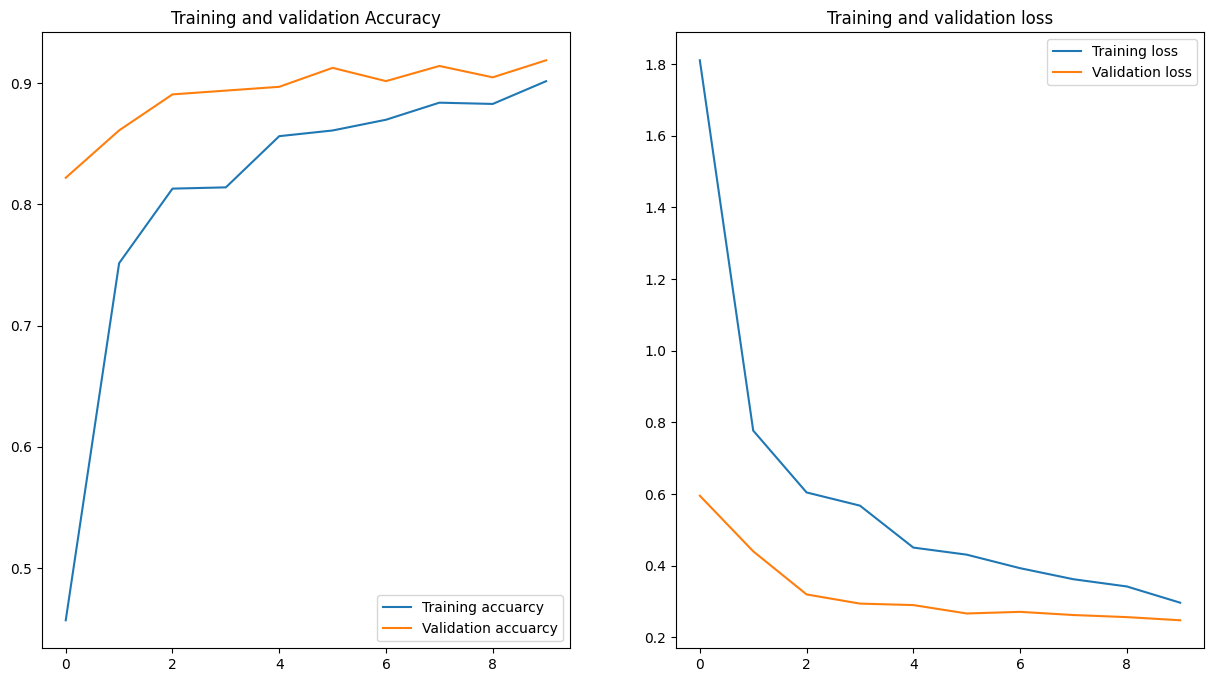

In [24]:
epochs_range = range(10)
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label='Training accuarcy')
plt.plot(epochs_range,val_acc, label='Validation accuarcy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss, label='Training loss')
plt.plot(epochs_range,val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')

In [25]:
model.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9185 - loss: 0.2568


[0.282423198223114, 0.9125000238418579]

Prediction

In [26]:
y_pred = model.predict(X_test)


20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step


In [27]:
y_pred 

array([[2.9127888e-08, 8.5778956e-05, 2.8719842e-06, ..., 5.2654382e-04,
        3.2655787e-01, 4.2180767e-05],
       [5.7690682e-05, 1.8488833e-04, 2.3318116e-04, ..., 2.6036769e-03,
        4.0755034e-03, 3.7157189e-04],
       [8.9118957e-06, 1.4513335e-04, 5.8635260e-07, ..., 5.0132461e-03,
        5.5523382e-05, 4.6729829e-07],
       ...,
       [6.9603128e-09, 5.7936984e-07, 2.8287859e-08, ..., 6.8971960e-05,
        1.7131075e-03, 2.4491752e-04],
       [6.5111781e-05, 1.9291485e-02, 5.3888707e-06, ..., 1.1839579e-03,
        8.3007435e-05, 3.6502948e-05],
       [3.3304506e-04, 1.1797004e-05, 9.0394758e-09, ..., 7.2315020e-06,
        5.3248776e-04, 1.6525853e-08]], dtype=float32)

Test case 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


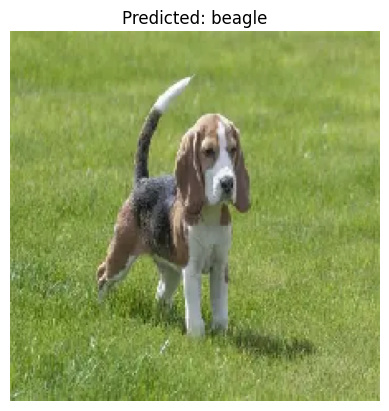

In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = 'dog.jpg'  
img = image.load_img(img_path, target_size=(224, 224))  

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0  

prediction = model.predict(img_array)

class_labels = ['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 
                'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 
                'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 
                'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees']
 
predicted_class = class_labels[np.argmax(prediction)]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
